# IM939 Lab 4 - Part 1 - Iris

## Data

Many datasets have a high number of dimensions. We are going to explore dimension reduction (principle component analysis) and clustering techniques.

The simple Iris dataset is great for introducing these methods.

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()

The iris dataset is in an odd format.

In [2]:
type(iris)

sklearn.utils._bunch.Bunch

Following [this stackoverflow answer](https://stackoverflow.com/questions/38105539/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataset) we can convert it into the pandas dataframe format we know and love.

In [3]:
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


We will scale the data between 0 and 1 to be on the safe side. All we are doing is placing the data on the same scale which is often called Normalisation (see [this blog entry](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/)).

Standardisation often means centering the data around the mean.

Some algorithms are senstive to the size of variables. For example, if the sepal widths were in meters and the other variables in cm then an algorithm may underweight sepal widths. Normalising the data puts all the data on a single scale.

If you cannot choose between them then try it both ways. You could compare the result with your raw data, the normalised data and the standardised data.

In [4]:
from sklearn.preprocessing import MinMaxScaler
col_names = iris_df.columns
iris_df =  pd.DataFrame(MinMaxScaler().fit_transform(iris_df))
iris_df.columns = col_names # Column names were lost, so we need to re-introduce
iris_df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [5]:
iris_df.shape

(150, 4)

Great.

Our dataset show us the length and width of both the sepal (leaf) and petals of 150 plants. The dataset is quite famous and you can find a [wikipedia page](https://en.wikipedia.org/wiki/Iris_flower_data_set) with details of the dataset.

## Questions

To motivate our exploration of the data, consider the sorts of questions we can ask:

* Are all our plants from the same species?
* Do some plants have similiar leaf and petal sizes?
* Can we differentiate between the plants using all 4 variables (dimensions)?
* Do we need to include both length and width, or can we reduce these dimensions and simplify our analysis?

## Initial exploration

We can explore a dataset with few variables using plots. 

In [6]:
import seaborn as sns

# some plots require a long dataframe structure
iris_df_long = iris_df.melt()
iris_df_long

,variable,value
0,sepal length (cm),0.222222
1,sepal length (cm),0.166667
2,sepal length (cm),0.111111
3,sepal length (cm),0.083333
4,sepal length (cm),0.194444
...,...,...
595,petal width (cm),0.916667
596,petal width (cm),0.750000
597,petal width (cm),0.791667
598,petal width (cm),0.916667


<Axes: xlabel='variable', ylabel='value'>

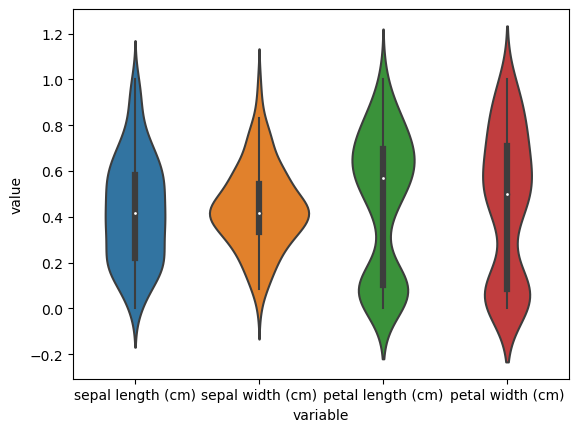

In [7]:
sns.violinplot(data = iris_df_long, x = 'variable', y = 'value')

The below plots use the wide data structure.

In [8]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

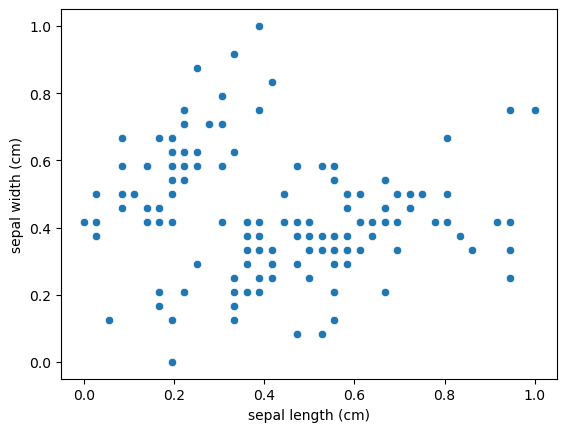

In [9]:
sns.scatterplot(data = iris_df, x = 'sepal length (cm)', y = 'sepal width (cm)')

<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

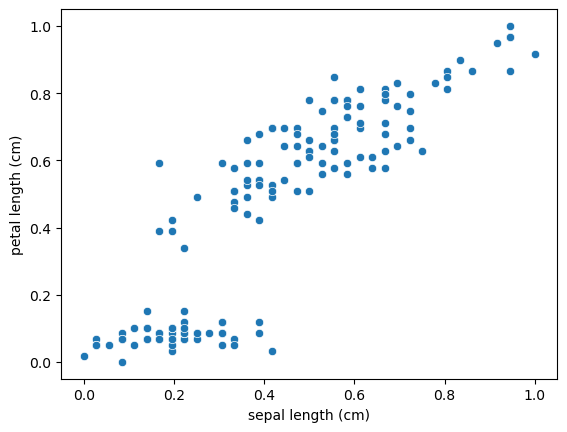

In [10]:
sns.scatterplot(data = iris_df, x = 'sepal length (cm)', y = 'petal length (cm)')

Interesting. There seem to be two groupings in the data.

It might be easier to look at all the variables at once.

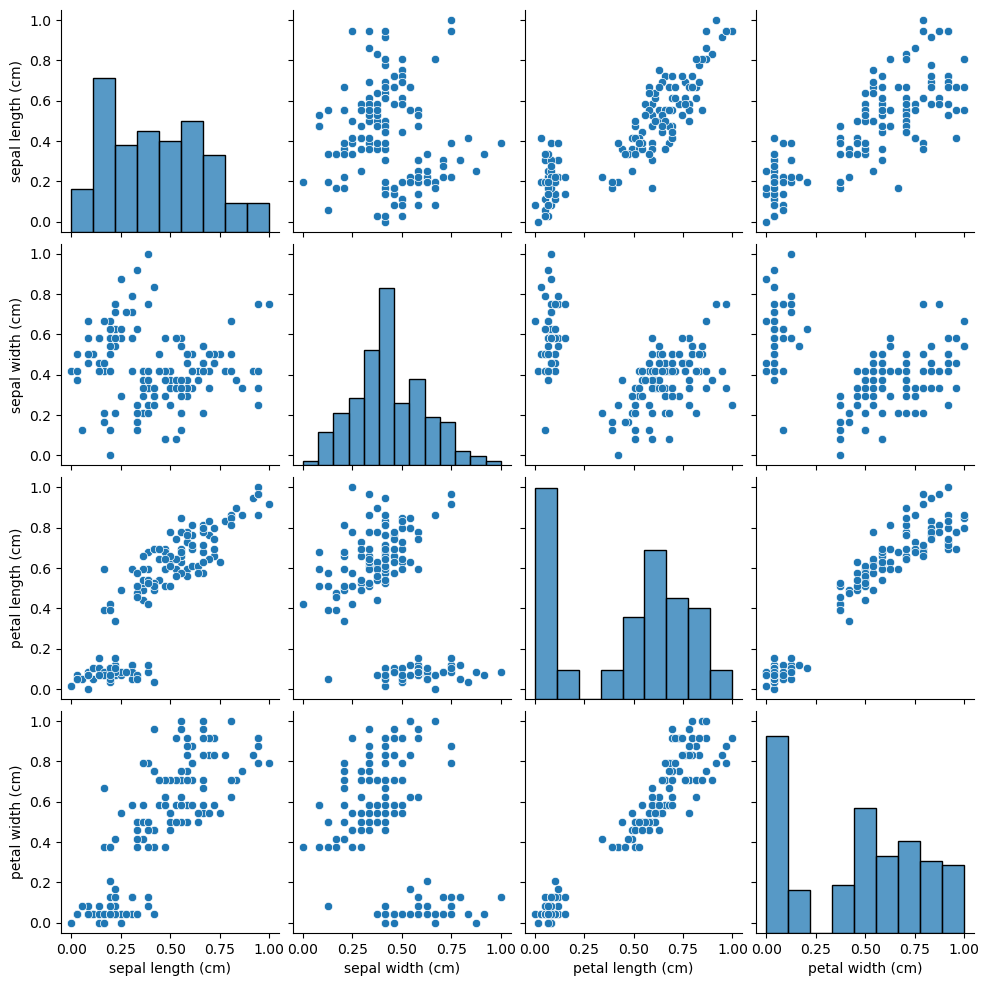

In [11]:
sns.pairplot(iris_df)

There seem to be some groupings in the data. Though we cannot easily identify which point corresponds to which row.

## Clustering

A cluster is simply a group based on simliarity. There are several methods and we will use a relatively simple one called K-means clustering.

In K-means clustering an algorithm tries to group our items (plants in the iris dataset) based on similarity. We decide how many groups we want and the algorithm does the best it can (an accessible introduction to k-means clustering is [here](https://www.analyticsvidhya.com/blog/2020/10/a-simple-explanation-of-k-means-clustering/)).

To start, we import the KMeans function from sklearn cluster module and turn our data into a matrix.

In [12]:
from sklearn.cluster import KMeans

iris = iris_df.values
iris

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

Specify our number of clusters.

In [13]:
k_means = KMeans(n_clusters = 3, init = 'random',  n_init = 10)

Fit our kmeans model to the data

In [14]:
k_means.fit(iris)

KMeans(init='random', n_clusters=3, n_init=10)

The algorithm has assigned the a label to each row.

In [15]:
k_means.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

Each row has been assigned a label.

To tidy things up we should put everything into a dataframe.

In [16]:
iris_df['Three clusters'] = pd.Series(k_means.predict(iris_df.values), index = iris_df.index)

In [17]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Three clusters
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,1
146,0.555556,0.208333,0.677966,0.750000,2
147,0.611111,0.416667,0.711864,0.791667,1
148,0.527778,0.583333,0.745763,0.916667,1


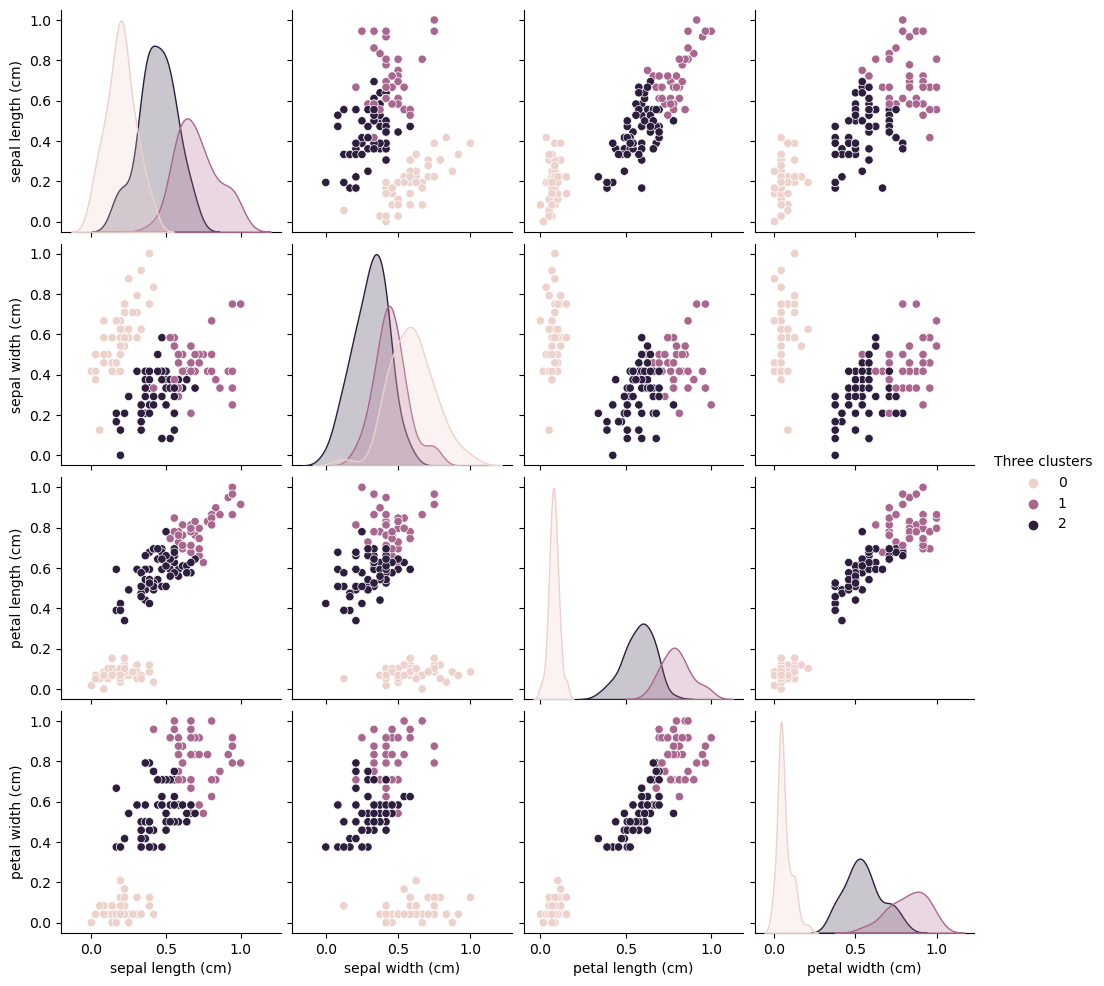

In [18]:
sns.pairplot(iris_df, hue = 'Three clusters')

That seems quite nice. We can also do individual plots if preferred.

<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>

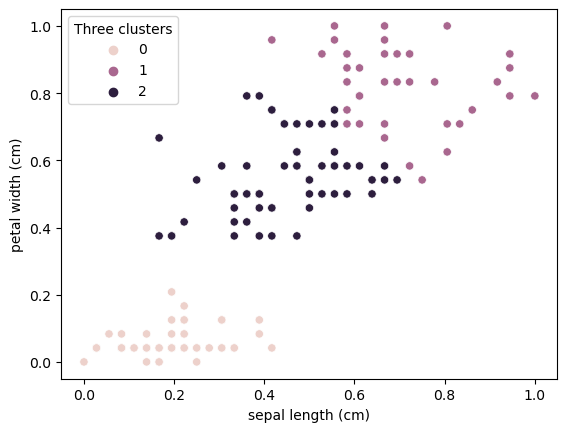

In [19]:
sns.scatterplot(data = iris_df, x = 'sepal length (cm)', y = 'petal width (cm)', hue = 'Three clusters')

K-means works by clustering the data around central points (often called centroids, means or cluster centers). We can extract the cluster centres from the kmeans object.

In [20]:
k_means.cluster_centers_

array([[0.19611111, 0.595     , 0.07830508, 0.06083333],
       [0.70726496, 0.4508547 , 0.79704476, 0.82478632],
       [0.44125683, 0.30737705, 0.57571548, 0.54918033]])

It is tricky to plot these using seaborn but we can use a normal maplotlib scatter plot.

Let us grab the groups.

In [21]:
group1 = iris_df[iris_df['Three clusters'] == 0]
group2 = iris_df[iris_df['Three clusters'] == 1]
group3 = iris_df[iris_df['Three clusters'] == 2]

Grab the centroids

In [22]:
import pandas as pd

centres = k_means.cluster_centers_

data = {'x': [centres[0][0], centres[1][0], centres[2][0]],
        'y': [centres[0][3], centres[1][3], centres[2][3]]}

df = pd.DataFrame (data, columns = ['x', 'y'])

Create the plot

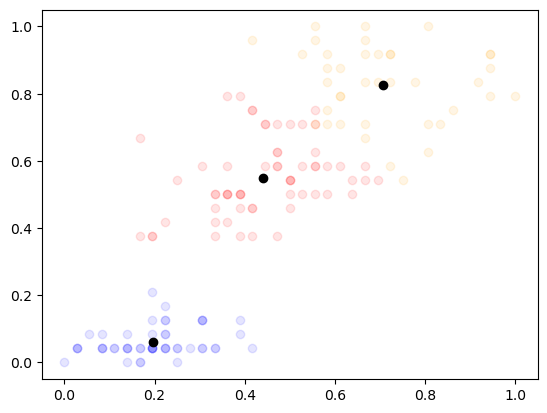

In [23]:
import matplotlib.pyplot as plt

# Plot each group individually
plt.scatter(
    x = group1['sepal length (cm)'], 
    y = group1['petal width (cm)'], 
    alpha = 0.1, color = 'blue'
)

plt.scatter(
    x = group2['sepal length (cm)'], 
    y = group2['petal width (cm)'], 
    alpha = 0.1, color = 'orange'
)

plt.scatter(
    x = group3['sepal length (cm)'], 
    y = group3['petal width (cm)'], 
    alpha = 0.1, color = 'red'
)

# Plot cluster centres
plt.scatter(
    x = df['x'], 
    y = df['y'], 
    alpha = 1, color = 'black'
)


## Number of clusters

What happens if we change the number of clusters?

Two groups

In [24]:
k_means_2 = KMeans(n_clusters = 2, init = 'random', n_init = 10)
k_means_2.fit(iris)
iris_df['Two clusters'] = pd.Series(k_means_2.predict(iris_df.iloc[:,0:4].values), index = iris_df.index)

Note that I have added a new column to the iris dataframe called 'cluster 2 means' and pass only our origonal 4 columns to the predict function (hence me using .iloc[:,0:4]).

How do our groupings look now (without plotting the cluster column)?

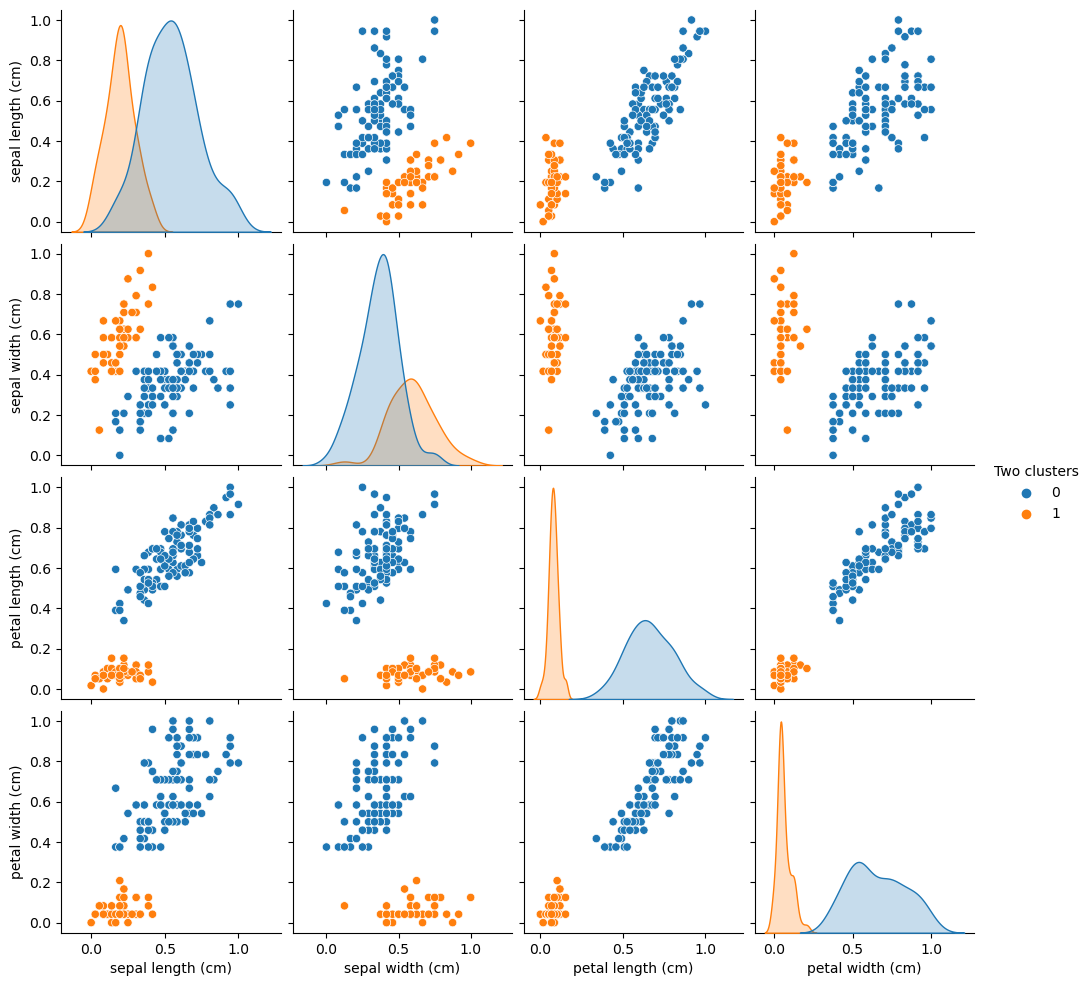

In [25]:
sns.pairplot(iris_df.loc[:, iris_df.columns != 'Three clusters'], hue = 'Two clusters')

Hmm, does the data have more than two groups in it?

Perhaps we should try 5 clusters instead.

In [26]:
k_means_5 = KMeans(n_clusters = 5, init = 'random', n_init = 10)
k_means_5.fit(iris)
iris_df['Five clusters'] = pd.Series(k_means_5.predict(iris_df.iloc[:,0:4].values), index = iris_df.index)

Plot without the columns called 'cluster' and 'Two cluster'

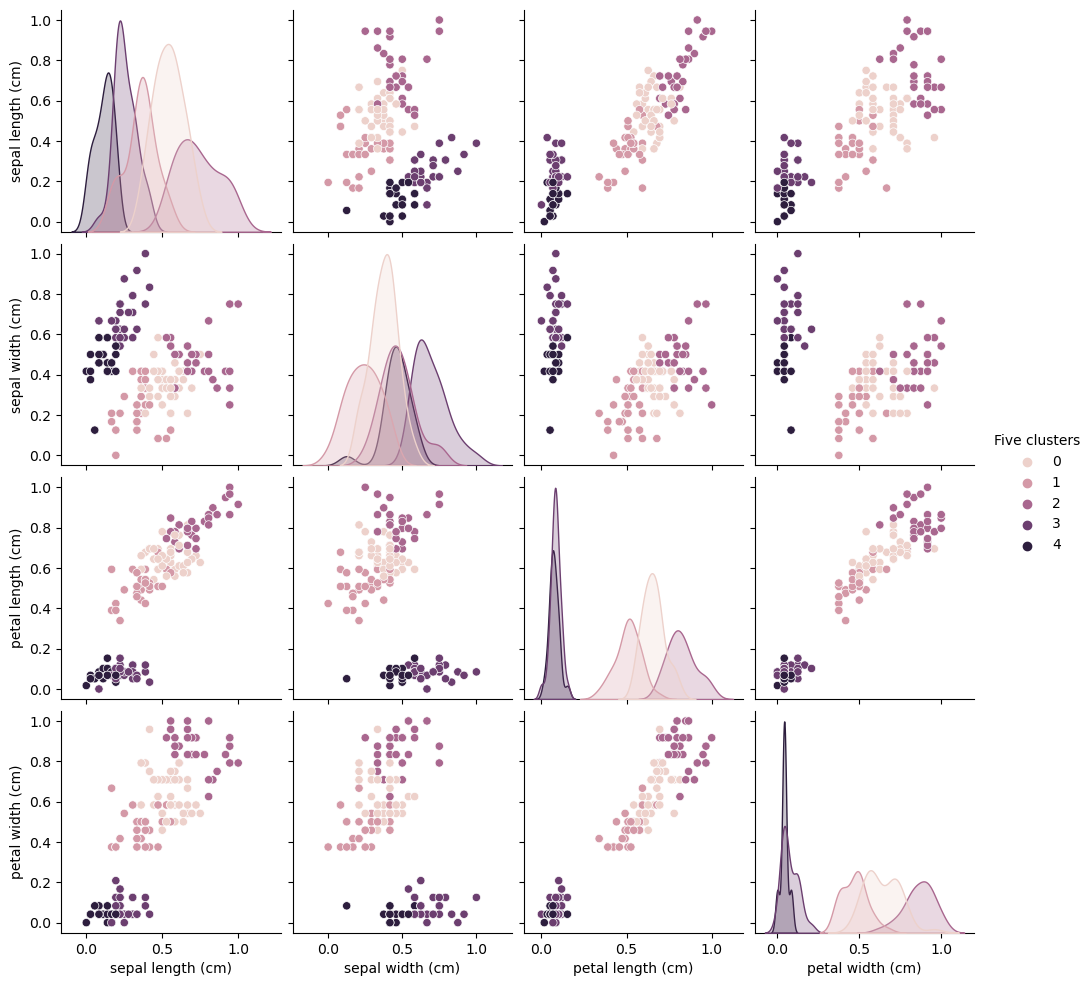

In [27]:
sns.pairplot(iris_df.loc[:, (iris_df.columns != 'Three clusters') & (iris_df.columns != 'Two clusters')], hue = 'Five clusters')

In [28]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Three clusters,Two clusters,Five clusters
0,0.222222,0.625000,0.067797,0.041667,0,1,3
1,0.166667,0.416667,0.067797,0.041667,0,1,4
2,0.111111,0.500000,0.050847,0.041667,0,1,4
3,0.083333,0.458333,0.084746,0.041667,0,1,4
4,0.194444,0.666667,0.067797,0.041667,0,1,3
...,...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,1,0,2
146,0.555556,0.208333,0.677966,0.750000,2,0,0
147,0.611111,0.416667,0.711864,0.791667,1,0,0
148,0.527778,0.583333,0.745763,0.916667,1,0,2


Which did best?

In [29]:
k_means.inertia_

6.982216473785234

In [30]:
k_means_2.inertia_

12.127790750538193

In [31]:
k_means_5.inertia_

4.580948640117293

It looks like our k = 5 model captures the data well. Intertia, [looking at the sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) as the _Sum of squared distances of samples to their closest cluster center._.

If you want to dive further into this then Real Python's [practical guide to K-Means Clustering](https://realpython.com/k-means-clustering-python/) is quite good.

## Principal Component Analysis (PCA)



PCA reduces the dimension of our data. The method derives point in an n dimentional space from our data which are uncorrelated.

To carry out a PCA on our Iris dataset where there are only two dimensions.

In [32]:
from sklearn.decomposition import PCA

n_components = 2

pca = PCA(n_components=n_components)
iris_pca = pca.fit(iris_df.iloc[:,0:4])

We can look at the components.

In [33]:
iris_pca.components_

array([[ 0.42494212, -0.15074824,  0.61626702,  0.64568888],
       [ 0.42320271,  0.90396711, -0.06038308, -0.00983925]])

These components are intersting. You may want to look at a [PennState article on interpreting PCA components](https://online.stat.psu.edu/stat505/lesson/11/11.4).

Our second column, 'sepal width (cm)' is positively correlated with our second principle component whereas the first column 'sepal length (cm)' is postively correlated with both.

You may want to consider:

* Do we need more than two components?
* Is it useful to keep sepal length (cm) in the dataset?

We can also examine the explained variance of the each principle component.

In [34]:
iris_pca.explained_variance_

array([0.23245325, 0.0324682 ])

A nice worked example showing the link between the explained variance and the component is [here](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html).

Our first principle component explains a lot more of the variance of data then the second.

### Dimension reduction

For our purposes, we are interested in using PCA for reducing the number of dimension in our data whilst preseving the maximal data variance.

We can extract the projected components from the model.

In [35]:
iris_pca_vals = pca.fit_transform(iris_df.iloc[:,0:4])

The numpy arrays contains the projected values.

In [36]:
type(iris_pca_vals)

numpy.ndarray

In [37]:
iris_pca_vals

array([[-6.30702931e-01,  1.07577910e-01],
       [-6.22904943e-01, -1.04259833e-01],
       [-6.69520395e-01, -5.14170597e-02],
       [-6.54152759e-01, -1.02884871e-01],
       [-6.48788056e-01,  1.33487576e-01],
       [-5.35272778e-01,  2.89615724e-01],
       [-6.56537790e-01,  1.07244911e-02],
       [-6.25780499e-01,  5.71335411e-02],
       [-6.75643504e-01, -2.00703283e-01],
       [-6.45644619e-01, -6.72080097e-02],
       [-5.97408238e-01,  2.17151953e-01],
       [-6.38943190e-01,  3.25988375e-02],
       [-6.61612593e-01, -1.15605495e-01],
       [-7.51967943e-01, -1.71313322e-01],
       [-6.00371589e-01,  3.80240692e-01],
       [-5.52157227e-01,  5.15255982e-01],
       [-5.77053593e-01,  2.93709492e-01],
       [-6.03799228e-01,  1.07167941e-01],
       [-5.20483461e-01,  2.87627289e-01],
       [-6.12197555e-01,  2.19140388e-01],
       [-5.57674300e-01,  1.02109180e-01],
       [-5.79012675e-01,  1.81065123e-01],
       [-7.37784662e-01,  9.05588211e-02],
       [-5.

Each row corresponds to a row in our data.

In [38]:
iris_pca_vals.shape

(150, 2)

In [39]:
iris_df.shape

(150, 7)

We can add the component to our dataset. I prefer to keep everything in one table and it is not at all required. You can just assign the values whichever variables you prefer.

In [40]:
iris_df['c1'] = [item[0] for item in iris_pca_vals]
iris_df['c2'] = [item[1] for item in iris_pca_vals]

In [41]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Three clusters,Two clusters,Five clusters,c1,c2
0,0.222222,0.625000,0.067797,0.041667,0,1,3,-0.630703,0.107578
1,0.166667,0.416667,0.067797,0.041667,0,1,4,-0.622905,-0.104260
2,0.111111,0.500000,0.050847,0.041667,0,1,4,-0.669520,-0.051417
3,0.083333,0.458333,0.084746,0.041667,0,1,4,-0.654153,-0.102885
4,0.194444,0.666667,0.067797,0.041667,0,1,3,-0.648788,0.133488
...,...,...,...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,1,0,2,0.551462,0.059841
146,0.555556,0.208333,0.677966,0.750000,2,0,0,0.407146,-0.171821
147,0.611111,0.416667,0.711864,0.791667,1,0,0,0.447143,0.037560
148,0.527778,0.583333,0.745763,0.916667,1,0,2,0.488208,0.149678


Plotting out our data on our new two component space.

<Axes: xlabel='c1', ylabel='c2'>

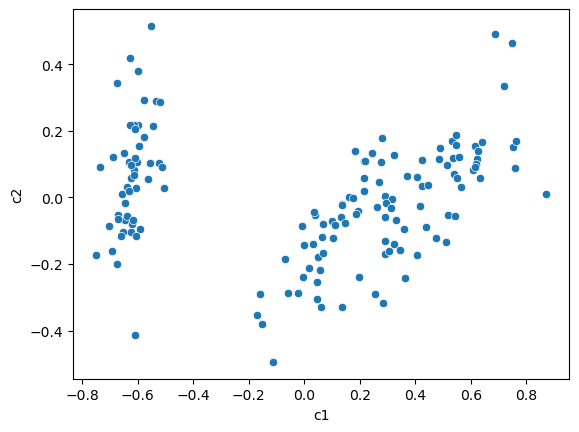

In [42]:
sns.scatterplot(data = iris_df, x = 'c1', y = 'c2')

We have reduced our three dimensions to two.

We can also colour by our clusters. What does this show us and is it useful?

<Axes: xlabel='c1', ylabel='c2'>

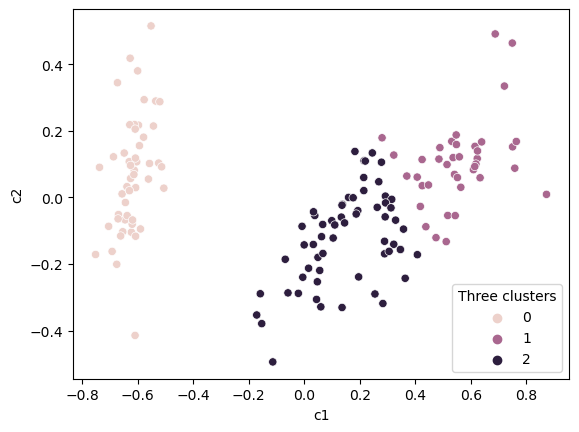

In [43]:
sns.scatterplot(data = iris_df, x = 'c1', y = 'c2', hue = 'Three clusters')

In [44]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Three clusters,Two clusters,Five clusters,c1,c2
0,0.222222,0.625000,0.067797,0.041667,0,1,3,-0.630703,0.107578
1,0.166667,0.416667,0.067797,0.041667,0,1,4,-0.622905,-0.104260
2,0.111111,0.500000,0.050847,0.041667,0,1,4,-0.669520,-0.051417
3,0.083333,0.458333,0.084746,0.041667,0,1,4,-0.654153,-0.102885
4,0.194444,0.666667,0.067797,0.041667,0,1,3,-0.648788,0.133488
...,...,...,...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,1,0,2,0.551462,0.059841
146,0.555556,0.208333,0.677966,0.750000,2,0,0,0.407146,-0.171821
147,0.611111,0.416667,0.711864,0.791667,1,0,0,0.447143,0.037560
148,0.527778,0.583333,0.745763,0.916667,1,0,2,0.488208,0.149678


## PCA to Clusters

We have reduced our 4D dataset to 2D whilst keeping the data variance. Reducing the data to fewer dimensions can help with the 'curse of dimensionality', reduce the change of overfitting a machine learning model (see [here](https://en.wikipedia.org/wiki/Dimensionality_reduction)) and reduce the computational complexity of a model fit.

Putting our new dimensions into a kMeans model

In [45]:
k_means_pca = KMeans(n_clusters = 3, init = 'random', n_init = 10)
iris_pca_kmeans = k_means_pca.fit(iris_df.iloc[:,-2:])

In [72]:
type(iris_df.iloc[:,-2:].values)

numpy.ndarray

In [47]:
iris_df['PCA 3 clusters'] = pd.Series(k_means_pca.predict(iris_df.iloc[:,-2:].values), index = iris_df.index)
iris_df

/Users/u2071219/anaconda3/envs/IM939/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Three clusters,Two clusters,Five clusters,c1,c2,PCA 3 clusters
0,0.222222,0.625000,0.067797,0.041667,0,1,3,-0.630703,0.107578,0
1,0.166667,0.416667,0.067797,0.041667,0,1,4,-0.622905,-0.104260,0
2,0.111111,0.500000,0.050847,0.041667,0,1,4,-0.669520,-0.051417,0
3,0.083333,0.458333,0.084746,0.041667,0,1,4,-0.654153,-0.102885,0
4,0.194444,0.666667,0.067797,0.041667,0,1,3,-0.648788,0.133488,0
...,...,...,...,...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,1,0,2,0.551462,0.059841,1
146,0.555556,0.208333,0.677966,0.750000,2,0,0,0.407146,-0.171821,2
147,0.611111,0.416667,0.711864,0.791667,1,0,0,0.447143,0.037560,1
148,0.527778,0.583333,0.745763,0.916667,1,0,2,0.488208,0.149678,1


As we only have two dimensions we can easily plot this on a single scatterplot.

<Axes: xlabel='c1', ylabel='c2'>

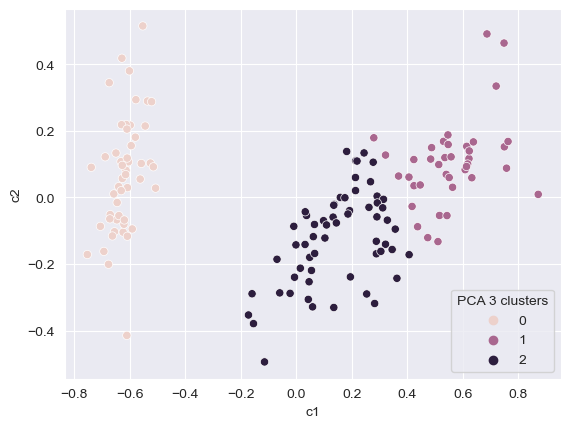

In [48]:
# a different seaborn theme
# see https://python-graph-gallery.com/104-seaborn-themes/
sns.set_style("darkgrid")
sns.scatterplot(data = iris_df, x = 'c1', y = 'c2', hue = 'PCA 3 clusters')

I suspect having two clusters would work better. We should try a few different models.

Copying the code from [here](https://medium.com/@dmitriy.kavyazin/principal-component-analysis-and-k-means-clustering-to-visualize-a-high-dimensional-dataset-577b2a7a5fe2) we can fit multiple numbers of clusters.

/Users/u2071219/anaconda3/envs/IM939/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/u2071219/anaconda3/envs/IM939/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/u2071219/anaconda3/envs/IM939/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/u2071219/anaconda3/envs/IM939/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureW

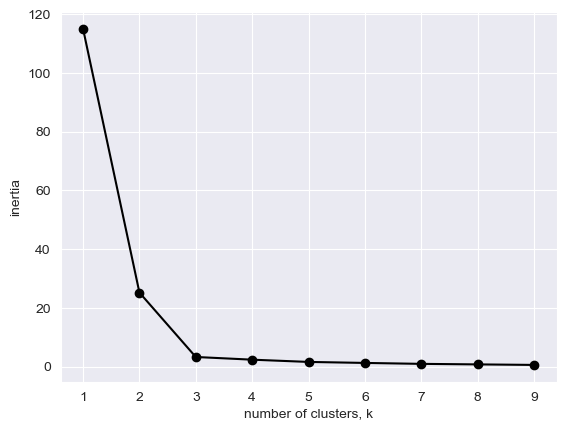

In [49]:
ks = range(1, 10)
inertias = [] # Create an empty list (will be populated later)
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, n_init = 10)
    
    # Fit model to samples
    model.fit(iris_df.iloc[:,-2:])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Three seems ok. We clearly want no more than three.

These types of plots show an point about model complexity. More free parameters in the model (here the number of clusters) will improve how well the model captures the data, often with reducing returns. However, a model which overfits the data will not be able to fit new data well - referred to overfitting. Randomish internet blogs introduce the topic pretty well, see [here](https://elitedatascience.com/overfitting-in-machine-learning), and also wikipedia, see [here](https://en.wikipedia.org/wiki/Overfitting).



## Missing values

Finally, how we deal with missing values can impact the results of PCA and kMeans clustering.

Lets us load in the iris dataset again and randomly remove 10% of the data (see code from [here](https://stackoverflow.com/questions/42091018/randomly-insert-nas-values-in-a-pandas-dataframe-with-no-rows-completely-miss)).

In [50]:
import numpy as np

x = load_iris()

In [51]:
iris_df = pd.DataFrame(x.data, columns = x.feature_names)

mask = np.random.choice([True, False], size = iris_df.shape, p = [0.2, 0.8])
mask[mask.all(1),-1] = 0

df = iris_df.mask(mask)

df.isna().sum()

sepal length (cm)    43
sepal width (cm)     28
petal length (cm)    16
petal width (cm)     32
dtype: int64

In [52]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,NaN,3.5,1.4,0.2
1,4.9,NaN,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,NaN
4,NaN,3.6,1.4,NaN
...,...,...,...,...
145,6.7,3.0,NaN,2.3
146,6.3,NaN,5.0,1.9
147,6.5,3.0,NaN,2.0
148,6.2,3.4,NaN,2.3


About 20% of the data is randomly an NaN.

### Zeroing

We can 0 them and fit our models.

In [53]:
df_1 = df.copy()
df_1 = df_1.fillna(0)

In [54]:
df_1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.0,3.5,1.4,0.2
1,4.9,0.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.0
4,0.0,3.6,1.4,0.0
...,...,...,...,...
145,6.7,3.0,0.0,2.3
146,6.3,0.0,5.0,1.9
147,6.5,3.0,0.0,2.0
148,6.2,3.4,0.0,2.3


/Users/u2071219/anaconda3/envs/IM939/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/u2071219/anaconda3/envs/IM939/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


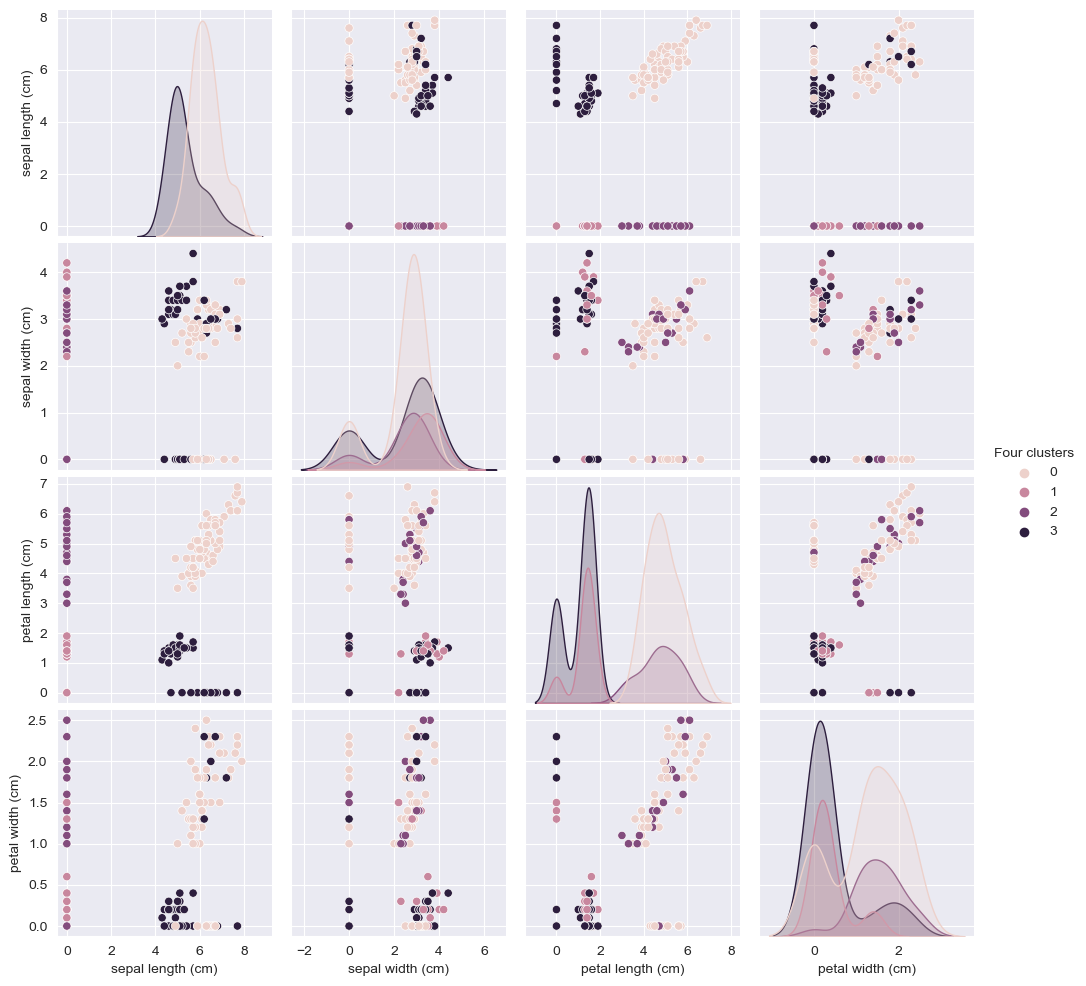

In [55]:
k_means_zero = KMeans(n_clusters = 4, init = 'random', n_init = 10)
k_means_zero.fit(df_1)
df_1['Four clusters'] = pd.Series(k_means_zero.predict(df_1.iloc[:,0:4].values), index = df_1.index)
sns.pairplot(df_1, hue = 'Four clusters')

What impact has zeroing the values had on our results?

Now, onto PCA.

<Axes: xlabel='c1', ylabel='c2'>

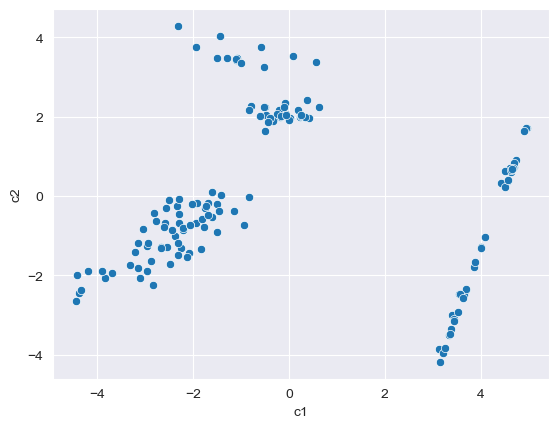

In [56]:
# PCA analysis
n_components = 2

pca = PCA(n_components=n_components)
df_1_pca = pca.fit(df_1.iloc[:,0:4])

# Extract projected values
df_1_pca_vals = df_1_pca.transform(df_1.iloc[:,0:4])
df_1['c1'] = [item[0] for item in df_1_pca_vals]
df_1['c2'] = [item[1] for item in df_1_pca_vals]

sns.scatterplot(data = df_1, x = 'c1', y = 'c2')

In [57]:
df_1_pca.explained_variance_

array([8.06859524, 3.97295071])

In [58]:
df_1_pca.components_

array([[-0.95453948,  0.04687664, -0.28647938, -0.06772387],
       [ 0.29627666,  0.04084117, -0.92692164, -0.22664602]])

### Replacing with the average

In [59]:
df_2 = df.copy()
for i in range(4):
    df_2.iloc[:,i] = df_2.iloc[:,i].fillna(df_2.iloc[:,i].mean())

In [60]:
df_2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.908411,3.500000,1.400000,0.200000
1,4.900000,3.046721,1.400000,0.200000
2,4.700000,3.200000,1.300000,0.200000
3,4.600000,3.100000,1.500000,1.212712
4,5.908411,3.600000,1.400000,1.212712
...,...,...,...,...
145,6.700000,3.000000,3.655224,2.300000
146,6.300000,3.046721,5.000000,1.900000
147,6.500000,3.000000,3.655224,2.000000
148,6.200000,3.400000,3.655224,2.300000


/Users/u2071219/anaconda3/envs/IM939/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/u2071219/anaconda3/envs/IM939/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


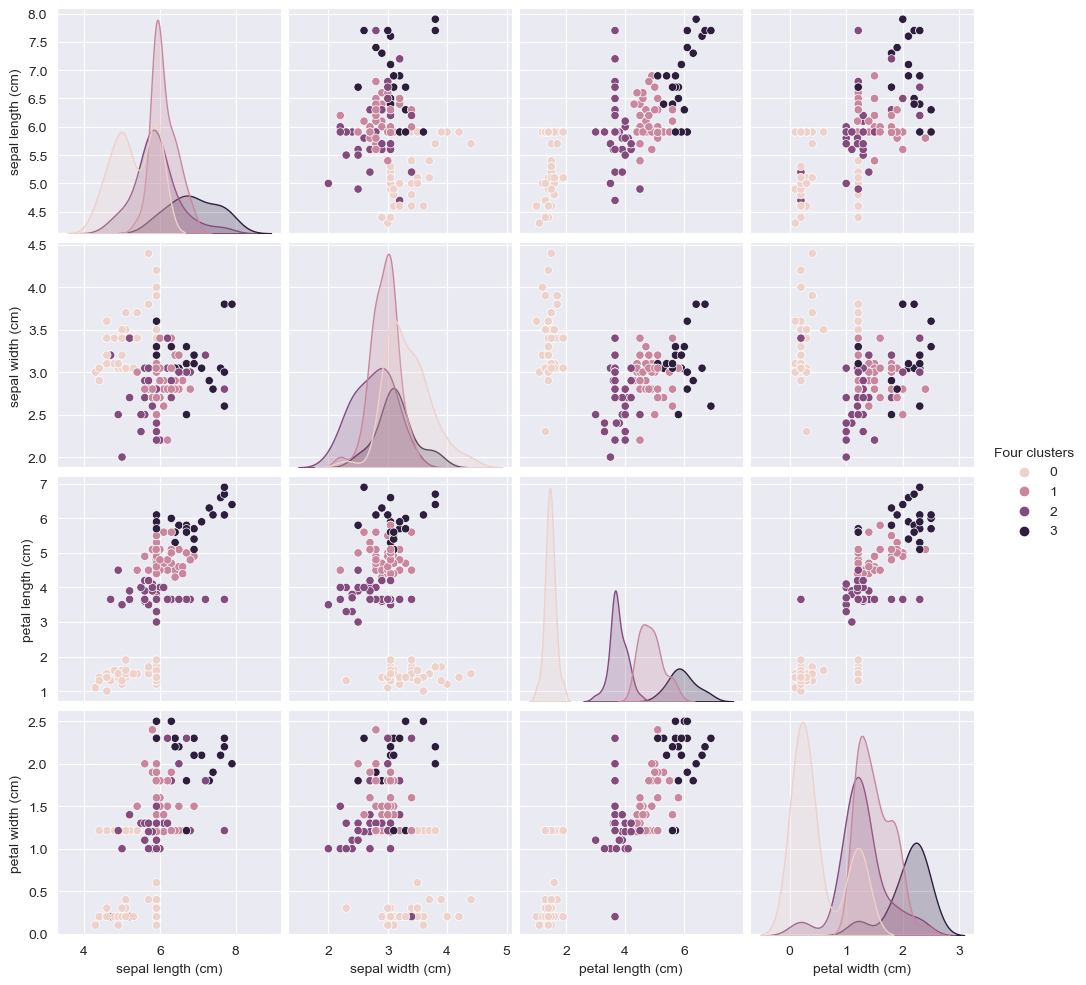

In [61]:
k_means_zero = KMeans(n_clusters = 4, init = 'random')
k_means_zero.fit(df_2)
df_2['Four clusters'] = pd.Series(k_means_zero.predict(df_2.iloc[:,0:4].values), index = df_2.index)
sns.pairplot(df_2, hue = 'Four clusters')

<Axes: xlabel='c1', ylabel='c2'>

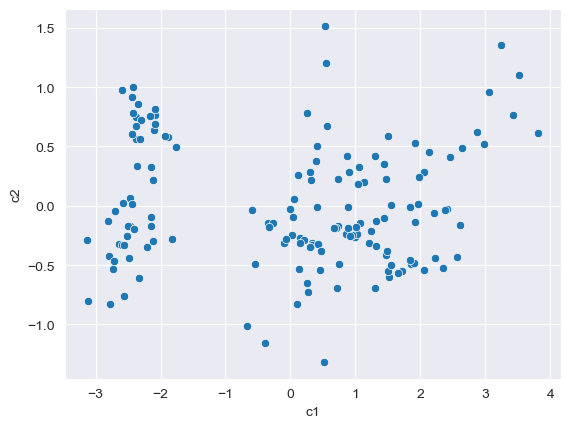

In [62]:
# PCA analysis
n_components = 2

pca = PCA(n_components=n_components)
df_2_pca = pca.fit(df_2.iloc[:,0:4])

# Extract projected values
df_2_pca_vals = df_2_pca.transform(df_2.iloc[:,0:4])
df_2['c1'] = [item[0] for item in df_2_pca_vals]
df_2['c2'] = [item[1] for item in df_2_pca_vals]

sns.scatterplot(data = df_2, x = 'c1', y = 'c2')

In [63]:
df_2_pca.explained_variance_

array([3.41604778, 0.2757051 ])

In [64]:
df_2_pca.components_

array([[ 0.28630875, -0.06778183,  0.90452988,  0.30863994],
       [ 0.89632999,  0.36499429, -0.25129987, -0.01483572]])

# Useful resources

The scikit learn UserGuide is very good. Both approaches here are often referred to as unsupervised learning methods and you can find the scikit learn section on these [here](https://scikit-learn.org/stable/unsupervised_learning.html).

If you have issues with the documentation then also look at the scikit-learn [examples](https://scikit-learn.org/stable/auto_examples/index.html).

Also, in no particular order:

* The [In-Depth sections of the Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/index.html). More for machine learning but interesting all the same.
* [Python for Data Analysis](https://www.amazon.co.uk/Python-Data-Analysis-Wes-Mckinney/dp/1491957662/ref=sr_1_3?dchild=1&keywords=Python+for+Data+Analysis%3A+Data+Wrangling&qid=1603809746&sr=8-3) (ebook is available via [Warwick library](https://encore.lib.warwick.ac.uk/iii/encore/search/C__Spython%20for%20data%20analysis__Orightresult__U;jsessionid=5A7D1DE9BAC479EE36B491F8FAC8F1FD?lang=eng))

In case you are bored:

* [Stack abuse](https://stackabuse.com/tag/python/) - Some fun blog entries to look at
* [Towards data science](https://towardsdatascience.com/) - a blog that contains a mix of intro, intermediate and advanced topics. Nice to skim through to try and undrestand something new.

Please do try out some of the techniques detailed in the lecture material The simple examples found in the scikit learn documentation are rather good. Generally, I find it much easier to try to understand a method using a simple dataset.